# Постановка задачи

Найти численное  решение граничной  задачи методом  стрельбы с шагом $0.01h$. Для численного решения задач Коши использовать явный метод трапеций. Сравнить найденное численное  решение с точным решением $u(x)$ , т.е. найти $max|u(x_i) - y_i|$.  

В одной системе  координат  построить  график  функции $u(x)$ и график полученного численного решения.

### Граничная задача
\begin{cases}
u'' + \frac{3x}{x^2 + 1}u' - \frac{2}{x^2 + 1}u = -\frac{4x^2 + 8}{(x^2 + 1)^3}\\
5u(0.5)=8\\
3u(1) + 2u'(1) = 1
\end{cases}

### Точное решение
$$u(x)=\frac{2}{x^2 + 1}$$

In [1]:
def f(x):
    return -((4 * x ** 2 + 8) / ((x ** 2 + 1) ** 3))


def p(x):
    return (3 * x) / (x ** 2 + 1)


def g(x):
    return -2 / (x ** 2 + 1)


def correct_solution(x):
    return 2 / (x ** 2 + 1)


<hr>

# Краткая теория, реализация метода


### Линейный метод стрельбы
Рассмотрим первую задачу Коши:

\begin{cases}
u_0''(x) + p(x)u_0'(x) + g(x)u_0(x) = f(x)\\
\alpha_0u_0(a) + \beta_0u_0'(a) = \gamma_0,
\end{cases}

где $\alpha_0$ и $\beta_0$ не обращаются в ноль одновременно. В нашем случае $\alpha_0 = 5 \ne 0$. Берём пристрелочный параметр $\eta_0 = u'(a)$, подстановкой во второе уравнение системы выше получаем, что
$$u(a) = \frac{\gamma_0 - \beta_0\eta_0}{\alpha_0},\ в\ нашем\ случае\ \beta_0=0 \Rightarrow u(a)=\frac{8}{5}.$$

Аналогично, рассмотрим вторую задачу Коши

\begin{cases}
u_1''(x) + p(x)u_1'(x) + g(x)u_1(x) = 0\\
\alpha_1u_1(a) + \beta_1u_1'(a) = 0,
\end{cases}

где $\alpha_1$ и $\beta_1$ не обращаются в ноль одновременно. При пристрелочном параметре $\eta_1 = u'(a)$ получаем
$$u(a) = \frac{-\beta_0\eta_1}{\alpha_0},\ в\ нашем\ случае\ \beta_0=0 \Rightarrow u(a)=0.$$

Решая задачи Коши, получаем $u_0$ и $u_1$ для левого граничного условия. Теперь найдём $C$, удовлетворяющее правому граничному условию, чтобы получить решение в виде $u = u_0 + C \cdot u_1$. Подставим это в правое граничное условие:

$$\alpha_1(u_0(b) + Cu_1(b)) + \beta_1(u_0'(b) + Cu_1'(b))=\gamma_1, $$
откуда
$$C = \frac{\gamma_1 - \alpha_1u_0(b) - \beta_1u_0'(b)}{\alpha_1u_1(b) + \beta_1u_1'(b)}.$$

Задачи Коши будем решать явным методом трапеций.


### Явный метод трапеций

Введём замену $\upsilon = u'$ (избавимся таким образом от второй производной). 

\begin{cases}
u'\equiv v\\
v'\equiv f(x)-p(x)v-g(x)u\\
\end{cases}

Тогда
$(j+1)$-ое приближение функции методом трапеций находится из системы:


\begin{cases}
u_{j+1}=u_j+\frac{\tau}{2} \cdot (k_1 +  k_2)\\
\upsilon_{j + 1}=\upsilon_j+\frac{\tau}{2} \cdot (q_1 + q_2)\\
u_0=u(a)\\
\upsilon_0=u'(a),
\end{cases}

где

\begin{cases}
k_1 = f_1(x_j, u_j, \upsilon_j)=\upsilon_j\\
k_2 = f_1(x_{j+1}, u_j + \tau k_1, v_j + \tau q_1)=\upsilon_j + \tau q_1\\
q_1 = f_2(x_j, u_j, \upsilon_j) = f(x_j) - p(x_j)\upsilon_j - g(x_j)u_j\\
q_2 = f_2(x_{j+1}, u_j + \tau k_1, v_j + \tau q_1)=f(x_{j+1}) - p(x_{j+1})(\upsilon_j + \tau q_1) - g(x_{j+1})(u_j + \tau k_1)
\end{cases}

In [2]:
def trapezium(x_j, u_j, v_j, tau, b, is_u0):
    """Реализация явного метода трапеций"""
    while x_j <= b:
        k1 = f(x_j) * int(is_u0) - p(x_j) * v_j - g(x_j) * u_j
        k2 = f(x_j + tau) * int(is_u0) - p(x_j + tau) * (v_j + tau * k1) - g(x_j + tau) * (u_j + tau * v_j)
        u_j += tau * (v_j + (v_j + tau * k1)) / 2
        v_j += tau * (k1 + k2) / 2
        x_j += tau
    return u_j, v_j


def get_c():
    a_1, b_1, g_1 = 3, 2, 1
    u_0_b, v_0_b = trapezium(x_j=0.5, u_j=8/5, v_j=0.5, tau=0.01, b=1, is_u0=True)
    u_1_b, v_1_b = trapezium(x_j=0.5, u_j=0, v_j=0.5, tau=0.01, b=1, is_u0=False)
    return (g_1 - a_1 * u_0_b - b_1 * v_0_b) / (a_1 * u_1_b + b_1 * v_1_b)


def pif_paf(x, c):
    """Реализация метода стрельбы"""
    u_0, v_0 = trapezium(x_j=0.5, u_j=8/5, v_j=0.5, tau=0.01, b=x, is_u0=True)
    u_1, v_1 = trapezium(x_j=0.5, u_j=0, v_j=0.5, tau=0.01, b=x, is_u0=False)
    return u_0 + c * u_1


### Оценка точности метода

In [3]:
import numpy as np


c = get_c()
x = np.arange(0.5, 1.01, 0.01)
correct = np.array([correct_solution(t + 0.01) for t in x])
shooting = np.array([pif_paf(t, c) for t in x])

print(f'max abs delta: {max(abs(correct - shooting)): .3e}')

max abs delta:  8.039e-06


### График явного метода трапеций рядом с точным решением

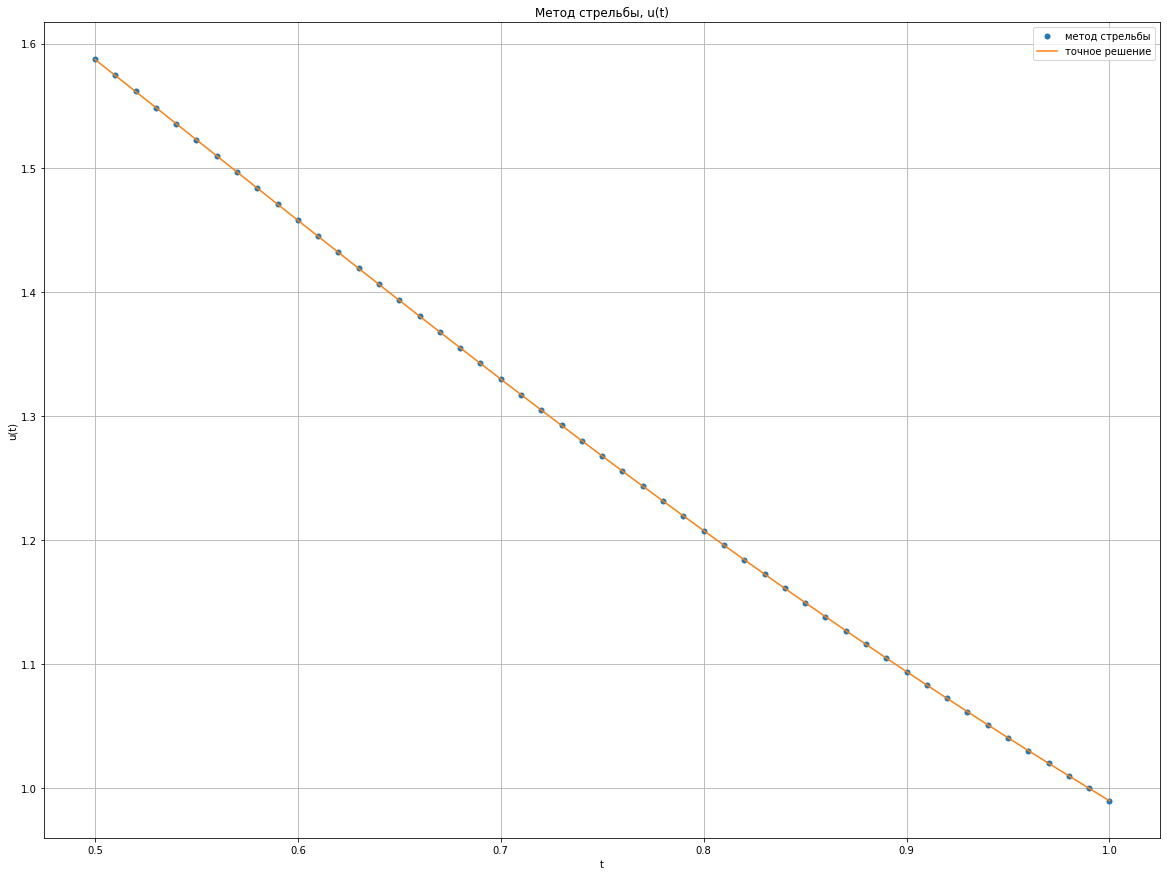

In [4]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x, shooting, '.', label='метод стрельбы', markersize=10)
ax.plot(x, correct, label='точное решение')

ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.set_title('Метод стрельбы, u(t)')
ax.grid()
ax.legend()
plt.show()

# Выводы

Линейный метод стрельбы — достаточно эффективный метод решения обыкновенных дифференциальных уравнений второго порядка, требующий решения всего двух задач Коши и обеспечивающий адекватную точность приближённого решения.